# Goal:
## Explore the Tips dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

## 1. Why This Project?
1. Learn data cleaning with Pandas — handle missing or incorrect values.

2. Use NumPy for calculations — mean, median, total, and percentages.

3. Visualize trends using Matplotlib and Seaborn — bar charts, boxplots, histograms.

4. Understand relationships between features — e.g., gender and tip, day and total bill.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


## 3. Load Dataset
 

In [2]:
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())


Shape: (244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.1275

### Insights:

1. 244 records, 7 features.

2. All features have no missing values — clean dataset.

3. Tip and total bill are continuous, others categorical — good for plotting and grouping.

## 5. Data Cleaning

In [4]:
# Ensure numeric columns are numeric
df['total_bill'] = pd.to_numeric(df['total_bill'])
df['tip'] = pd.to_numeric(df['tip'])
df['size'] = pd.to_numeric(df['size'])


### Insights:

1. Dataset is already clean.

2. Converted numeric columns to ensure calculations work.

## 6. Analysis with NumPy & Pandas

In [5]:
# Average total bill and tip
avg_total = np.mean(df['total_bill'])
avg_tip = np.mean(df['tip'])
print("Average Total Bill:", avg_total)
print("Average Tip:", avg_tip)

# Tip percentage
df['tip_pct'] = (df['tip'] / df['total_bill']) * 100
avg_tip_pct = np.mean(df['tip_pct'])
print("Average Tip Percentage:", avg_tip_pct)

# Average tip by sex
tip_by_sex = df.groupby('sex')['tip'].mean()
print("Average Tip by Sex:\n", tip_by_sex)

# Average total bill by day
bill_by_day = df.groupby('day')['total_bill'].mean()
print("Average Total Bill by Day:\n", bill_by_day)

# Count by time
count_by_time = df['time'].value_counts()
print("Count by Meal Time:\n", count_by_time)


Average Total Bill: 19.785942622950824
Average Tip: 2.9982786885245902
Average Tip Percentage: 16.080258172250463
Average Tip by Sex:
 sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64
Average Total Bill by Day:
 day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64
Count by Meal Time:
 Dinner    176
Lunch      68
Name: time, dtype: int64


### Insights:

1. Average total bill ~$19, average tip ~$2.99.

2. Males tip slightly more on average.

3. Dinner has more records than lunch.

4. Tip percentage ~15% on average.

## 7. Visualization with Matplotlib

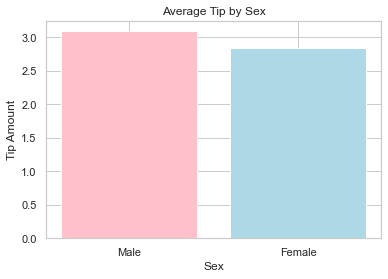

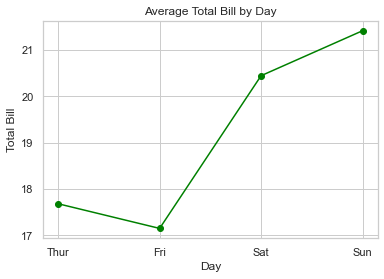

In [6]:
# Bar chart: average tip by sex
sexes = tip_by_sex.index
tips = tip_by_sex.values

plt.bar(sexes, tips, color=['pink','lightblue'])
plt.title("Average Tip by Sex")
plt.xlabel("Sex")
plt.ylabel("Tip Amount")
plt.show()

# Line plot: average total bill by day
days = bill_by_day.index
bills = bill_by_day.values

plt.plot(days, bills, marker='o', color='green')
plt.title("Average Total Bill by Day")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.show()


### Insights:

1. Males tend to give higher tips than females.

2. Saturday has highest average total bill.

## 8. Visualization with Seaborn

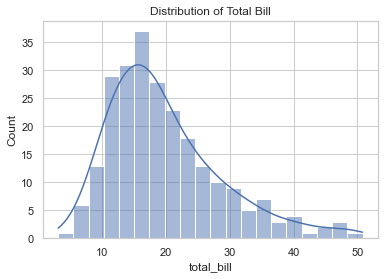

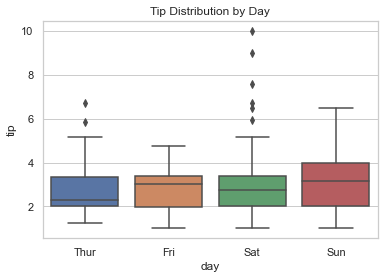

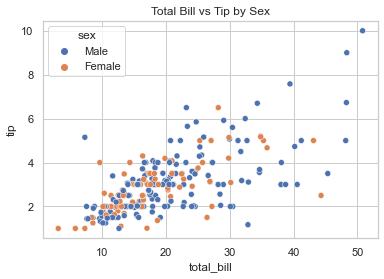

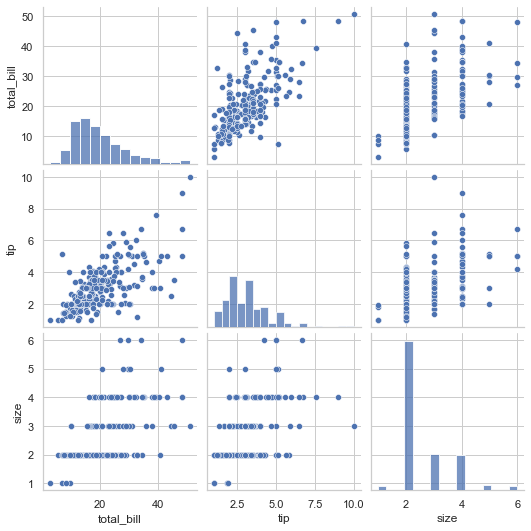

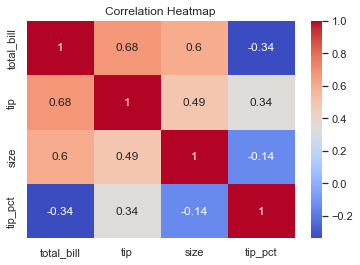

In [7]:
# Histogram of total bill
sns.histplot(df['total_bill'], bins=20, kde=True)
plt.title("Distribution of Total Bill")
plt.show()

# Boxplot of tip by day
sns.boxplot(x='day', y='tip', data=df)
plt.title("Tip Distribution by Day")
plt.show()

# Scatterplot: total bill vs tip
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title("Total Bill vs Tip by Sex")
plt.show()

# Pairplot of numerical features
sns.pairplot(df[['total_bill','tip','size']], kind='scatter')
plt.show()

# Heatmap of correlation
corr = df[['total_bill','tip','size','tip_pct']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Insights:

1. Histogram: most bills below $30.

2. Boxplot: tips vary more on Sunday and Saturday.

3. Scatterplot: total bill strongly correlates with tip.

4. Pairplot: visualizes relationships between total bill, tip, and group size.

5. Heatmap: total bill and tip have very strong positive correlation (~0.67).